# Homework 2: U.S. Boundary Currents

Name: Edward Chen

Date: 2/2/2025

#### Overview
In class, we examined the general structure of ocean circulation on large scales and found that major ocean basins contain gyres - large circulation cells in the ocean. Further, we saw that vertical motion is driven by changes in density. In this homework, you will examine the structure of the ocean currents along the east and west coasts of the U.S and consider how these currents fit into the broader ocean circulation.

#### Import Modules
To begin, import the modules required to access data from netCDF files and make plots:

In [1]:
# import modules here

import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc4
import xarray as xr


### Part 1: Horizonal Velocity Structure
First, examine the mean velocity on the west and east coasts of the U.S. Begin by loading in both the `EVEL` and `NVEL` fields from the `EVEL_2015_12.nc` and `VVEL_2015_12.nc` files, respectively -- these fields represent the zonal (eastward-flowing) and meridional (westward-flowing) velocity in the model. 

In [2]:
# read in the EVEL and VVEL files to an xarray dataset
# note that these files must be in the same folder as this notebook

# start by opening the data sets:
ds_east = xr.open_dataset('EVEL_2015_12.nc')
ds_north = xr.open_dataset('NVEL_2015_12.nc')
ds_west = xr.open_dataset('WVELSTAR_2015_12.nc')


In [6]:
# store the velocity components and longitude/latitude data
# into numpy arrays

# then, store the EVEL and SVEL variables in numpy arrays
evel = np.array(ds_east['EVEL'])
nvel = np.array(ds_north['NVEL'])
wvel = np.array(ds_west['WVELSTAR'])

# in addition, make variables for longitude and latitude
lon = np.array(ds_west['longitude'])
lat = np.array(ds_west['latitude'])

Now that you have the data read in, make a plot of the eastward and northward velocity at the surface of the ocean. Be sure to add a title to each plot and some labels for the x and y axes.

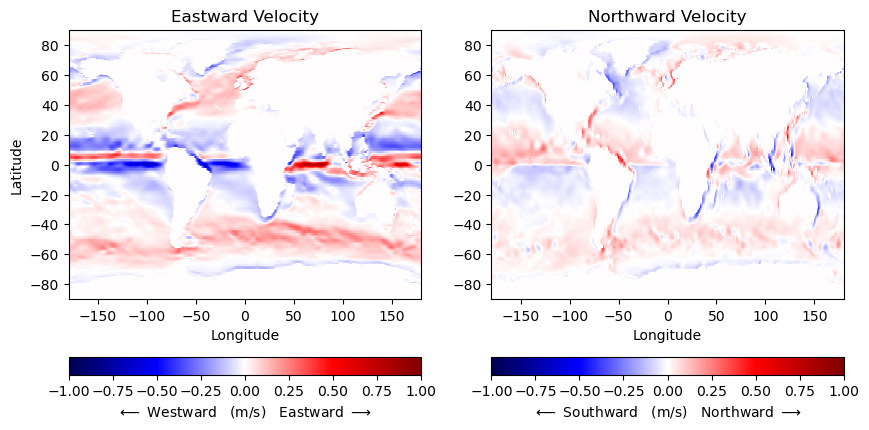

In [7]:
# make a plot of the velocity components (one for each)
# use a divergent colormap (such as seismic) to visualize the data
# for interpretation, it will likely be helpful to adjust the data
# bounds to be +/- 0.5 or even +/- 0.1

# make a figure
fig = plt.figure(figsize=(10,5))

# make a subplot for the eastward velocity at the surface
plt.subplot(1,2,1)

C = plt.pcolormesh(lon,lat,evel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Westward   (m/s)   Eastward $\longrightarrow$' )
plt.title('Eastward Velocity')
plt.ylabel('Latitude')
plt.xlabel('Longitude')


# make a subplot for the northward velocity at the surface
plt.subplot(1,2,2)

C = plt.pcolormesh(lon,lat,nvel[0, 0, :, :], vmin = -1, vmax=1, cmap='seismic')
plt.colorbar(C, orientation='horizontal',
             label='$\longleftarrow$ Southward   (m/s)   Northward $\longrightarrow$' )
plt.xlabel('Longitude')
plt.title('Northward Velocity');

### Questions:
1. What direction are the surface currents moving (roughly) at:
    - 30$^{\circ}$N on the east cost of the U.S.? the west coast?
    - 45$^{\circ}$N on the east cost of the U.S.? the west coast?
2. Which current flows faster? East coast or west coast?
2. Explain how these currents are part of the gyres in the North Atlantic and North Pacific.

In [25]:
# change this cell to a markdown and input your response here

# 1. The surface currents on the east coast of the U.S. at 30 degrees N are traveling northeast (approximately 0.50 m/s eastward and 
#    0.5 m/s northward). On the west coast, currents travel southward (approximately 0 m/s eastward and 0.1 m/s southward). 
#    The surface currents on the east coast of the U.S. at 45 degrees N are traveling southeast (approximately 0.25 m/s eastward and 
#    0.60 m/s southward). On the west coast, currents travel northeast (approximately 0.10 m/s eastward and 0.25 m/s northward). 

# 2. Overall, the east coast has much faster currents in terms of both eastward and northward velocity. 

# 3. These currents are part of the gyres in the North Atlantic and North Pacific due to the Coriolis Force, which creates clockwise-
#    traveling currents in the Northern Hemisphere (counterclockwise in the Southern Hemisphere). The west coast experiences currents
#    that travel southward from the pole to the equator, while the east coast experiences currents that travel northward from the equator
#    to the pole. 

### Part 2: Horizonal Temperature Structure
Next, examine the mean temperature on the coasts of the U.S. Load in the temperature field `THETA` from the `THETA_2015_12.nc` file. 

In [9]:
# read in the THETA file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_theta = xr.open_dataset('THETA_2015_12.nc')


In [10]:
# store the THETA grid into a into numpy array

theta = np.array(ds_theta['THETA'])

Similar to your plot above, make a plot of the temperature at the surface of the ocean. 

Text(0.5, 0, 'Longitude')

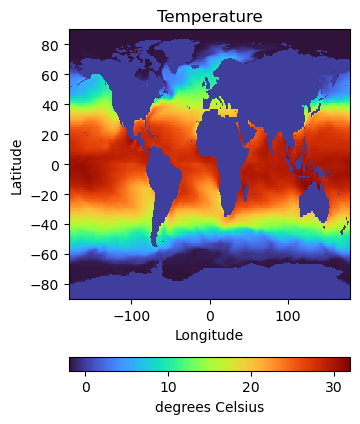

In [11]:
# make a plot of the temperature
# set the data bounds to -2 to 32 with a 
# sensible color map to visualize the data

# make a figure
fig = plt.figure(figsize=(8,5))

# plot the data
# enter your plotting code here
plt.subplot(1,2,1)
C = plt.pcolormesh(lon,lat,theta[0, 0, :, :], vmin = -2, vmax=32, cmap='turbo')
plt.colorbar(C, orientation='horizontal',
             label='degrees Celsius' )
plt.title('Temperature')
plt.ylabel('Latitude')
plt.xlabel('Longitude')



### Questions:
1. How does the temperature on the west cost of the U.S. compare to the east coast at the same latitude?
2. How might ocean currents contribute to this temperature regime?

In [24]:
# change this cell to a markdown and input your response here

# 1. The temperature on the west coast is generally colder at approximately 15 degrees Celsius compared to the east coast, which is about 
#    25 degrees Celsius. 

# 2. Ocean currents contribute to this temperature regime as the North Atlantic and North Pacific gyres carry warmer water from the 
#    equator to the poles and cooler water from the poles to the equator. This would explain the colder west coast waters and warmer
#    east coast waters, as the North Pacific gyre would carry cooler water from the poles southward to the equator and the North 
#    Atlantic gyre would carry warmer water from the equator northward to the poles. 

### Part 3: Vertical Structure
Next, look at the vertical structure of ocean currents as well as temperature on the U.S coast. Being by loading in the vertical velocity field `WVELSTAR` from the `WVELSTAR_2015_12.nc` file. This variable estimates the speed at which water is moving in the vertical direction.

In [13]:
# read in the WVELSTAR file to an xarray dataset
# note that this file must be in the same folder as this notebook

ds_west = xr.open_dataset('WVELSTAR_2015_12.nc')

In [14]:
# store the WVELSTAR grid into a into numpy array

wvel = np.array(ds_west['WVELSTAR'])

Since we'll be plotting a vertical profile, we'll also need a depth variable. Read this variable into a numpy array in the same way you read in the data above.

In [15]:
# read in the depth variable to a numpy array
# Hint: Look at the metadata for the WVELSTAR
# What is the name of the depth variable?

Zl = np.array(ds_west['Zl'])

Next, create side-by-side plots of vertical velocity and temperature along the row corresponding to the latitude 40$^{\circ}$N i.e. index 259 along the latitude axis.

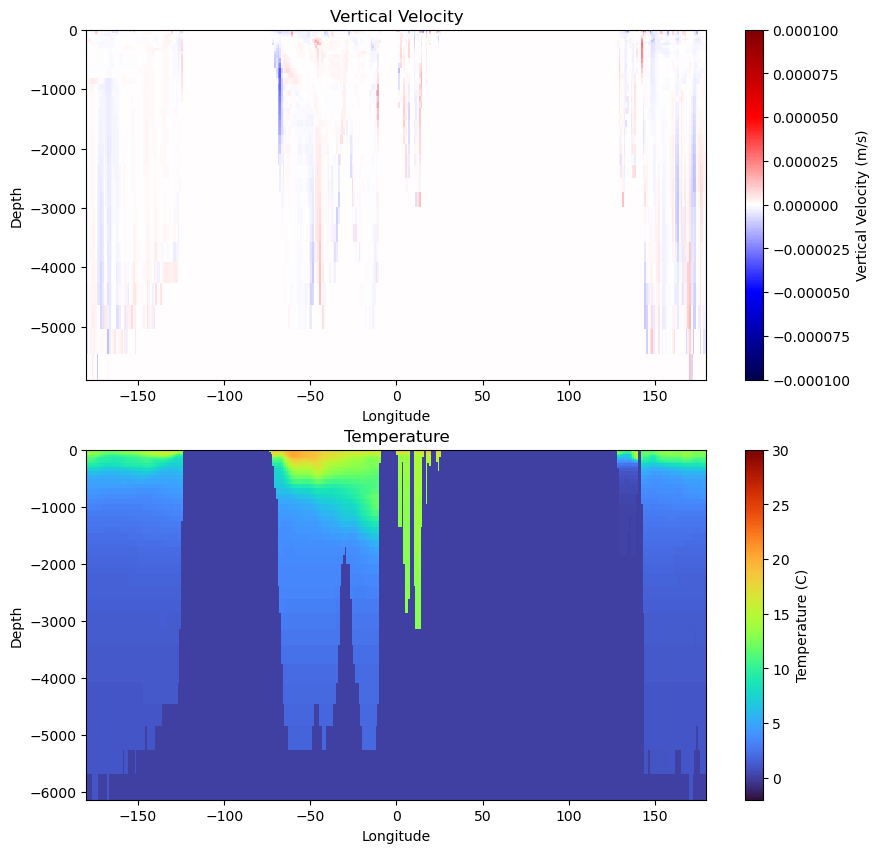

In [38]:
# make a figure
fig = plt.figure(figsize=(10,10))

# make subplot the vertical velocity
# use a divergent colorbar
# you will need to adjust the color bounds appropriately for this data
# try a few values and see what works
plt.subplot(2,1,1)

C = plt.pcolormesh(lon, Zl, wvel[0, :, 259, :], vmin=-0.0001, vmax=0.0001, cmap='seismic')
plt.colorbar(C, label='Vertical Velocity (m/s)')
plt.title('Vertical Velocity')
plt.ylabel('Depth')
plt.xlabel('Longitude')

# make a subplot of the vertical profile of temperature
plt.subplot(2,1,2)

Z = np.array(ds_theta['Z'])

C = plt.pcolormesh(lon,Z,theta[0, :, 259, :], vmin = -2, vmax=30, cmap='turbo')
plt.colorbar(C, label='Temperature (C)' )
plt.title('Temperature')
plt.ylabel('Depth')
plt.xlabel('Longitude');


### Questions:
1. How does the vertical velocity in the current on the west coast compare to that on the east?
2. How does the speed of vertical velocity compare to horizontal velocity? Why are they different? In other words, what are the forcing mechanisms associated with each?
3. How might the vertical currents adjacent to the coastline contribute to the differences in surface temperature?
4. Challenge question: On the west coast of the U.S., the prevailing winds tend to flow south in the spring time. How might these winds contribute to the vertical velocity identified in question 1?

In [39]:
# change this cell to a markdown and input your response here

# 1. The vertical velocity in the currents on the west coast move at approximately 0.000025 m/s while the currents in the east coast 
#    move at approximately -0.00001 m/s. 

# 2. The speed of vertical velocity is much greater on the west coast than on the east coast, which is the opposite of the horizontal 
#    current velocity on the west and east coasts. This could be due to Ekman Spirals, which results from winds blowing currents
#    upward, causing the west coast to experience greater vertical velocities than the east coast. 

# 3. The vertical currents adjacent to the coastline contribute to the differences in surface temperature as higher vertical velocity 
#    causes upwelling, in which cold water rises, resulting in colder surface temperatures. This explains the cooler temperatures of
#    the west coast and the warmer temperatures of the east coast. 

# 4. Prevailing southward-flowing winds may increase the vertical velocity through Ekman Spirals, in which winds blow currents upward. 
